In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astrodust import distlib
from astrodust import extinction
from astrodust.grainpop import GrainPop, make_MRN_GrainPop

In [3]:
MD   = 1.e-5 # g cm^-2
fgra = 0.4
fsil = 1.0-0.4

# Parameters for a power law distribution of dust grains
AMIN = 0.005
AMAX = 0.3
PLAW = 3.5

# Examples using distlib.GrainPop objects

1. Initializing a **distlib.GrainPop** object

2. Calculating an extinction curve

3. Calculating dust grain albedo

## 1. Initializing a distlib.GrainPop object

In [4]:
WD01_gra = GrainPop(sizedist=distlib.WD01(comp='Graphite'),
                    composition=distlib.Composition('Graphite'),
                    scatmodel=extinction.Mie(),
                    md=MD*fgra)

Using MW model for Graphite from
Weingartner, C. & Draine, B. T. 2001, ApJ, 548, 296
http://adsabs.harvard.edu/abs/2001ApJ...548..296W
rho = 2.240000
('R_V   = ', 3.1000000000000001)
('bc    = ', 0.0)
('alpha = ', -2.25)
('beta  = ', -0.064799999999999996)
('a_t   = ', 0.00745)
('a_c   = ', 0.60599999999999998)
('C     = ', 9.9400000000000001e-11)


In [5]:
WD01_sil = GrainPop(sizedist=distlib.WD01(comp='Silicate'),
                    composition=distlib.Composition('Silicate'),
                    scatmodel=extinction.Mie(), 
                    md=MD*fsil)

Using MW model for Silicate from
Weingartner, C. & Draine, B. T. 2001, ApJ, 548, 296
http://adsabs.harvard.edu/abs/2001ApJ...548..296W
rho = 3.800000
('R_V   = ', 3.1000000000000001)
('bc    = ', 0.0)
('alpha = ', -1.48)
('beta  = ', -9.3399999999999999)
('a_t   = ', 0.17199999999999999)
('a_c   = ', 0.1)
('C     = ', 1.0200000000000001e-12)


There is a shortcut for a powerlaw distribution of dust grains (MRN)

In [6]:
MRN_gra = make_MRN_GrainPop(AMIN, AMAX, PLAW,
                            compname='Graphite', scatname='Mie', md=MD*fgra)

In [7]:
MRN_sil = make_MRN_GrainPop(AMIN, AMAX, PLAW,
                            compname='Silicate', scatname='Mie', md=MD*fsil)

# 2. Calculating an extinction curve

In [27]:
WAVEL = np.logspace(3.0, 6.0, 100) # 0.1-100 microns, log spaced samples

In [36]:
%%time
WD01_gra.calc_tau_ext(WAVEL)
WD01_sil.calc_tau_ext(WAVEL)

Using optical constants for graphite,
Draine, B. T. 2003, ApJ, 598, 1026
http://adsabs.harvard.edu/abs/2003ApJ...598.1026D
Using optical constants for astrosilicate,
Draine, B. T. 2003, ApJ, 598, 1026
http://adsabs.harvard.edu/abs/2003ApJ...598.1026D
CPU times: user 810 ms, sys: 3.08 ms, total: 814 ms
Wall time: 816 ms


In [29]:
%%time
MRN_gra.calc_tau_ext(WAVEL)
MRN_sil.calc_tau_ext(WAVEL)

Using optical constants for graphite,
Draine, B. T. 2003, ApJ, 598, 1026
http://adsabs.harvard.edu/abs/2003ApJ...598.1026D
Using optical constants for astrosilicate,
Draine, B. T. 2003, ApJ, 598, 1026
http://adsabs.harvard.edu/abs/2003ApJ...598.1026D
CPU times: user 1.38 s, sys: 3.28 ms, total: 1.38 s
Wall time: 1.4 s


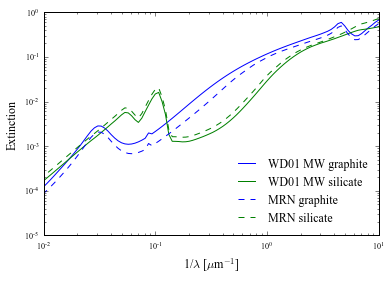

In [35]:
inverse_wavel = 1.0 / (WAVEL * 1.e-4)  # 1/wavelength, um^-1

plt.plot(inverse_wavel, WD01_gra.ext.tau_ext, 'b', label='WD01 MW graphite')
plt.plot(inverse_wavel, WD01_sil.ext.tau_ext, 'g', label='WD01 MW silicate')

plt.plot(inverse_wavel, MRN_gra.ext.tau_ext, 'b--', label='MRN graphite')
plt.plot(inverse_wavel, MRN_sil.ext.tau_ext, 'g--', label='MRN silicate')

plt.xlabel(r'1/$\lambda$ [$\mu$m$^{-1}$]')
plt.ylabel('Extinction')

plt.loglog()
plt.legend(loc='lower right', frameon=False)